# Chapter 15 
 Statistics for Data Science and Analytics<br>
by Peter C. Bruce, Peter Gedeck, Janet F. Dobbins

Publisher: Wiley; 1st edition (2024) <br>
<!-- ISBN-13: 978-3031075650 -->

(c) 2024 Peter C. Bruce, Peter Gedeck, Janet F. Dobbin

The code needs to be executed in sequence.

Python packages and Python itself change over time. This can cause warnings or errors. We
"Warnings" are for information only and can usually be ignored. 
"Errors" will stop execution and need to be fixed in order to get results. 

If you come across an issue with the code, please follow these steps

- Check the repository (https://gedeck.github.io/sdsa-code-solutions/) to see if the code has been upgraded. This might solve the problem.
- Report the problem using the issue tracker at https://github.com/gedeck/sdsa-code-solutions/issues
- Paste the error message into Google and see if someone else already found a solution

 Load required packages

In [2]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

# Example PEFR: resampling model coefficients

 Load the data and train regression model

In [3]:
pefr = pd.read_csv("pefr.txt", sep="\t")
predictors = ["exposure"]
outcome = "pefr"

model = LinearRegression()
model.fit(pefr[["exposure"]], pefr["pefr"])
print(f"Intercept: {model.intercept_:.2f}")
print(f"Slope: {model.coef_[0]:.6f}")

Intercept: 424.58
Slope: -4.184576


 Resample the data and train regression model

In [4]:
random.seed(123)
# we resample index values with replacement
box = list(pefr.index)
intercepts = []
coefficients = {coef: [] for coef in predictors}
for _ in range(1000):
    # resample with replacement
    resample = random.choices(box, k=len(box))
    # train regression model
    model_r = LinearRegression()
    model_r.fit(pefr.loc[resample, predictors], pefr.loc[resample, outcome])
    intercepts.append(model_r.intercept_)
    for coef in predictors:
        coefficients[coef].append(model_r.coef_[0])
intercepts = np.array(intercepts)
coefficients = {coef: np.array(values) for coef, values in coefficients.items()}

 Calculate confidence intervals for intercept

Intercept 90% CI: [389.46 457.23]


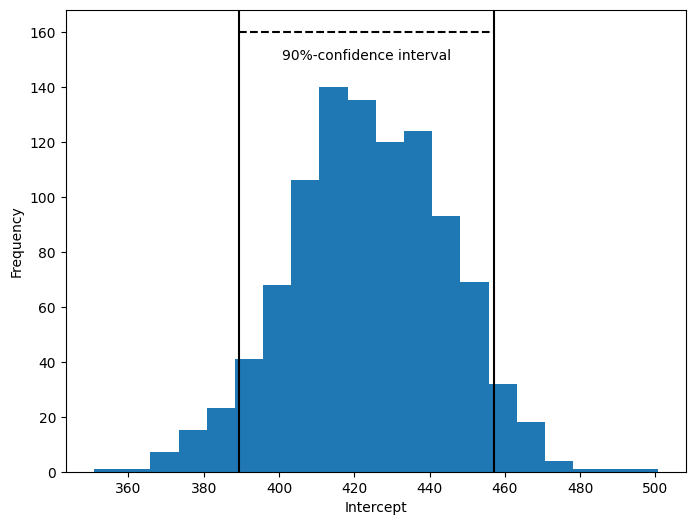

In [5]:
ci_interval_intercept = np.percentile(intercepts, [5, 95])
print(f"Intercept 90% CI: {ci_interval_intercept.round(2)}")

fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(intercepts, bins=20)
for ci in ci_interval_intercept:
    ax.axvline(ci, color="black")
ax.plot(ci_interval_intercept, [160, 160], color="black", linestyle="--")
ax.text(ci_interval_intercept.mean(), 150, "90%-confidence interval", ha="center")

ax.set_xlabel("Intercept")
ax.set_ylabel("Frequency")
plt.show()

 Calculate confidence intervals for coefficients / slope

Intercept 90% CI: [-6.32 -1.88]


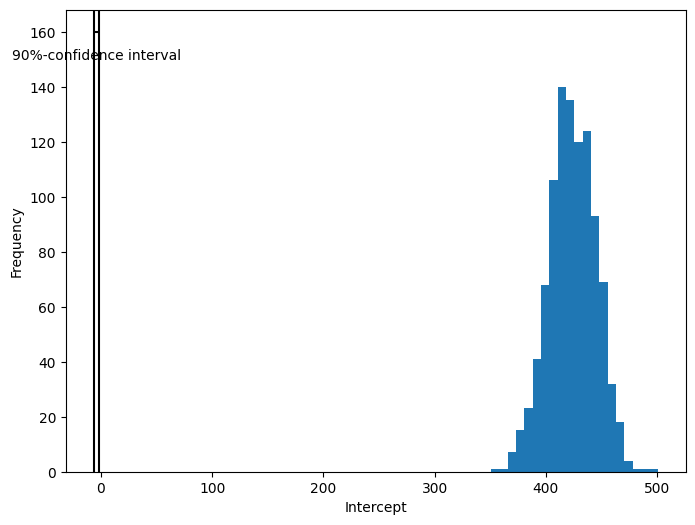

In [6]:
ci_coefficients = {coef: np.percentile(values, [5, 95])
                   for coef, values in coefficients.items()}
coef = "exposure"
print(f"Intercept 90% CI: {ci_coefficients[coef].round(2)}")

fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(intercepts, bins=20)
for ci in ci_coefficients[coef]:
    ax.axvline(ci, color="black")
ax.plot(ci_coefficients[coef], [160, 160], color="black", linestyle="--")
ax.text(ci_coefficients[coef].mean(), 150, "90%-confidence interval", ha="center")

ax.set_xlabel("Intercept")
ax.set_ylabel("Frequency")
plt.show()

# Interpreting Software Output

In [7]:
model = smf.ols("pefr ~ exposure", data=pefr).fit()
print(model.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.069    
Dependent Variable: pefr             AIC:                1475.3501
Date:               2023-07-10 13:08 BIC:                1480.9581
No. Observations:   122              Log-Likelihood:     -735.68  
Df Model:           1                F-statistic:        9.974    
Df Residuals:       120              Prob (F-statistic): 0.00201  
R-squared:          0.077            Scale:              10290.   
-------------------------------------------------------------------
             Coef.    Std.Err.     t     P>|t|    [0.025    0.975] 
-------------------------------------------------------------------
Intercept   424.5828   20.7960  20.4165  0.0000  383.4081  465.7575
exposure     -4.1846    1.3250  -3.1582  0.0020   -6.8079   -1.5612
------------------------------------------------------------------
Omnibus:              0.767         Durbin-Watson:           1.111
Prob(Omn

 ANOVA analysis

In [8]:
import statsmodels.api as sm
print(sm.stats.anova_lm(model))

             df        sum_sq        mean_sq         F    PR(>F)
exposure    1.0  1.026333e+05  102633.255269  9.974366  0.002008
Residual  120.0  1.234764e+06   10289.702381       NaN       NaN


# Example: Cholesterol and Miles Walked

 Prepare and visualize the dataset

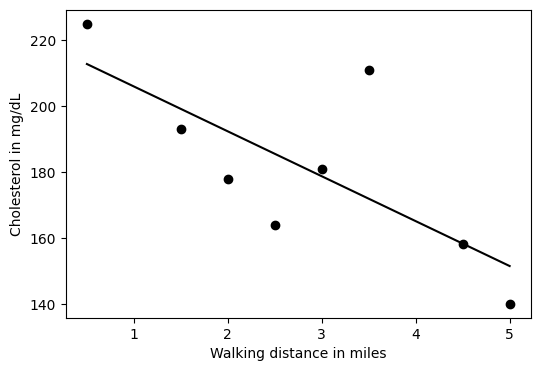

In [9]:
chol = pd.DataFrame({
    "Miles": [1.5, 0.5, 3, 2.5, 5, 3.5, 4.5, 2],
    "Chol": [193, 225, 181, 164, 140, 211, 158, 178],
})
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(chol.Miles, chol.Chol, color="k")
ax.plot([0.5, 5], [219.58 - 13.628 * 0.5, 219.58 - 13.628 * 5], color="black")

ax.set_xlabel("Walking distance in miles")
ax.set_ylabel("Cholesterol in mg/dL")
plt.show()

 Fit the model

In [10]:
model = smf.ols("Chol ~ Miles", data=chol).fit()
print(model.summary2())

                Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.464  
Dependent Variable: Chol             AIC:                72.7289
Date:               2023-07-10 13:08 BIC:                72.8878
No. Observations:   8                Log-Likelihood:     -34.364
Df Model:           1                F-statistic:        7.057  
Df Residuals:       6                Prob (F-statistic): 0.0377 
R-squared:          0.540            Scale:              420.28 
----------------------------------------------------------------
               Coef.   Std.Err.    t    P>|t|   [0.025   0.975] 
----------------------------------------------------------------
Intercept     219.5793  16.1468 13.5989 0.0000 180.0694 259.0891
Miles         -13.6282   5.1302 -2.6565 0.0377 -26.1813  -1.0751
----------------------------------------------------------------
Omnibus:               4.871       Durbin-Watson:          2.145
Prob(Omnibus):         0.088       Jarque-

/Users/petergedeck/opt/miniconda3/envs/mlba-r/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


 Calculate residuals and squared residuals

In [11]:
chol["predicted"] = model.predict(chol)
chol["residuals"] = model.resid
chol["squared_residuals"] = chol.residuals ** 2
print(chol)

   Miles  Chol   predicted  residuals  squared_residuals
0    1.5   193  199.136986  -6.136986          37.662601
1    0.5   225  212.765166  12.234834         149.691155
2    3.0   181  178.694716   2.305284           5.314333
3    2.5   164  185.508806 -21.508806         462.628747
4    5.0   140  151.438356 -11.438356         130.835992
5    3.5   211  171.880626  39.119374        1530.325405
6    4.5   158  158.252446  -0.252446           0.063729
7    2.0   178  192.322896 -14.322896         205.145358


 Calculate RMSE

In [12]:
print(np.sqrt(np.mean(chol.squared_residuals)))

17.75410980231896


# Example: Bootstrapping the Boston Housing model

 Prepare the dataset

In [13]:
housing = pd.read_csv("boston-housing.csv")
outcome = "MEDV"
predictors = ["CRIM", "RM"]

 implement bootstrappin procedure

In [14]:
random.seed(123)

box = list(housing.index)
intercepts = []
coefficients = {coef: [] for coef in predictors}
for _ in range(1000):
    # resample with replacement
    resample = random.choices(box, k=len(box))
    # train regression model
    model_r = LinearRegression()
    model_r.fit(housing.loc[resample, predictors], housing.loc[resample, outcome])
    intercepts.append(model_r.intercept_)
    for coef in predictors:
        coefficients[coef].append(model_r.coef_[0])
intercepts = np.array(intercepts)
coefficients = {coef: np.array(values) for coef, values in coefficients.items()}

 Visualize the distributions}    

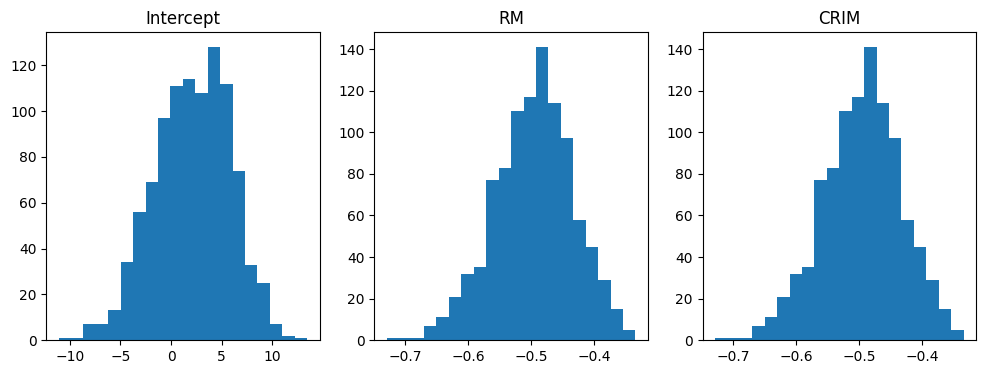

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].hist(intercepts, bins=20)
axes[0].set_title("Intercept")
axes[1].hist(coefficients["RM"], bins=20)
axes[1].set_title("RM")
axes[2].hist(coefficients["CRIM"], bins=20)
axes[2].set_title("CRIM")
plt.show()

 Build a model using statsmodels

In [16]:
model = smf.ols("MEDV ~ CRIM + RM", data=housing).fit()
print(model.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.445    
Dependent Variable: MEDV             AIC:                1431.9896
Date:               2023-07-10 13:08 BIC:                1442.7514
No. Observations:   267              Log-Likelihood:     -712.99  
Df Model:           2                F-statistic:        107.8    
Df Residuals:       264              Prob (F-statistic): 6.03e-35 
R-squared:          0.449            Scale:              12.357   
-------------------------------------------------------------------
               Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept      2.5088    2.8215    0.8892  0.3747  -3.0467   8.0643
CRIM          -0.4904    0.0399  -12.3025  0.0000  -0.5689  -0.4119
RM             3.0083    0.4606    6.5311  0.0000   2.1013   3.9152
------------------------------------------------------------------
Omnibus

# Example: Tayko Software

 Load the data

In [17]:
tayko = pd.read_csv("tayko.csv")
tayko

,source_a,source_b,source_r,Freq,last_update_days_ago,Web order,Address_is_res,Spending
0,0,1,0,2,3662,1,1,128
1,0,0,0,2,3883,0,0,127
2,1,0,0,1,3215,0,0,174
3,0,0,0,1,1465,0,1,192
4,0,0,1,2,2943,1,0,386
...,...,...,...,...,...,...,...,...
995,1,0,0,3,1415,1,1,130
996,0,0,0,1,2807,0,0,55
997,0,0,0,2,2466,0,0,133
998,0,0,0,2,1136,0,0,184
